In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/insurance.csv')
df.head()
# df.shape

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [16]:
df.duplicated().sum()

1

In [17]:
df.drop_duplicates(inplace=True)

In [18]:
df.duplicated().sum()

0

In [19]:
import seaborn as sns

In [20]:
df.value_counts('sex')

sex
male      675
female    662
Name: count, dtype: int64

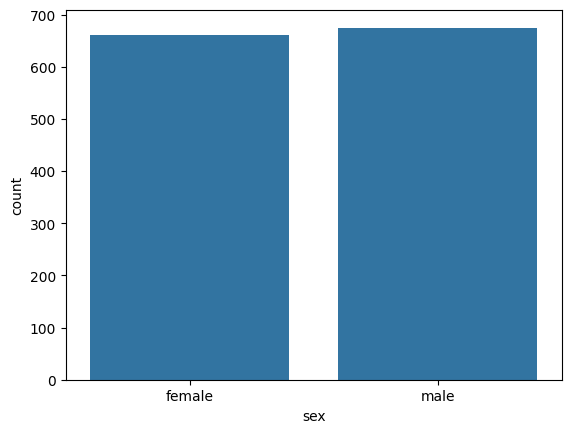

In [21]:
sns.countplot(x='sex', data=df)
plt.show()

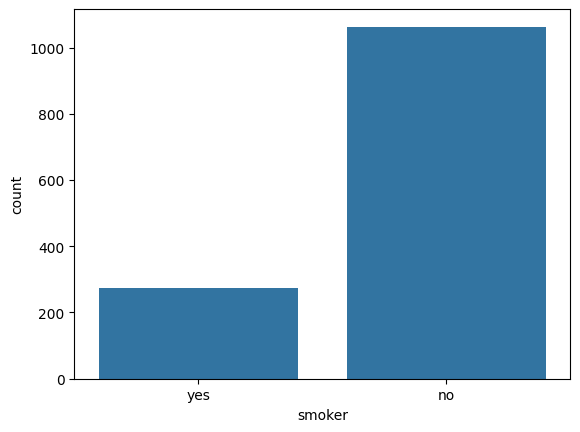

In [22]:
sns.countplot(x='smoker', data=df)
plt.show()

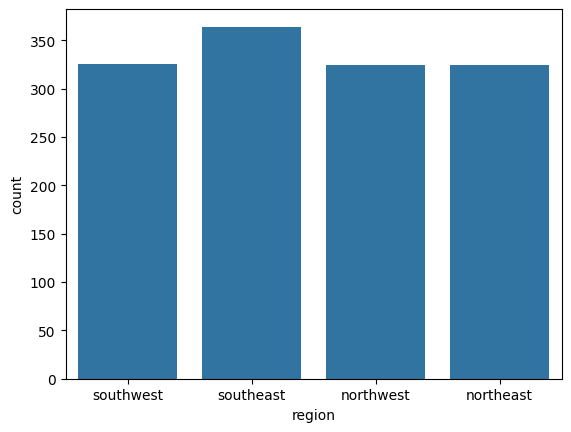

In [23]:
sns.countplot(x='region', data=df)
plt.show()

In [24]:
from sklearn import preprocessing

In [25]:
labelencoder = preprocessing.LabelEncoder()

In [26]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


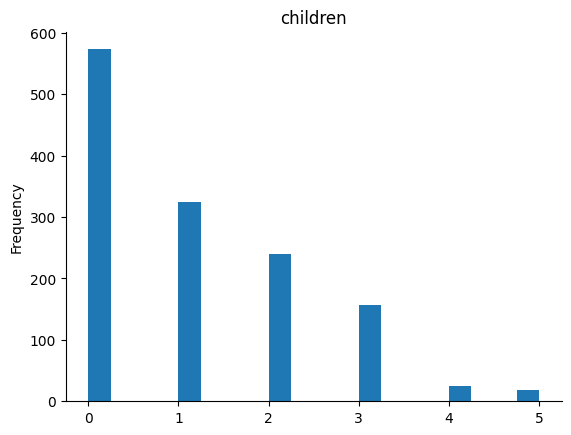

In [28]:
from matplotlib import pyplot as plt
df['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [29]:
df['smoker'] = labelencoder.fit_transform(df['smoker'])
df['sex'] = labelencoder.fit_transform(df['sex'])
df['region'] = labelencoder.fit_transform(df['region'])

In [30]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [31]:
df.corr()['charges'].sort_values(ascending = False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

<Axes: >

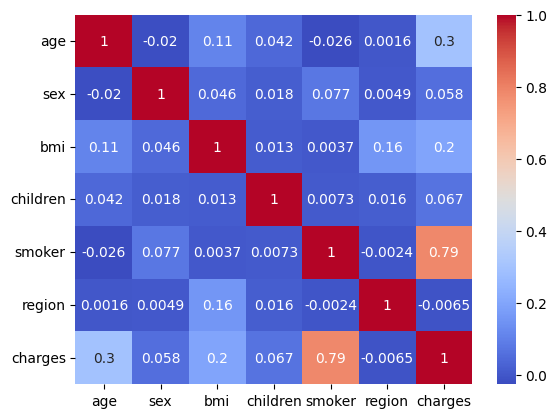

In [32]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

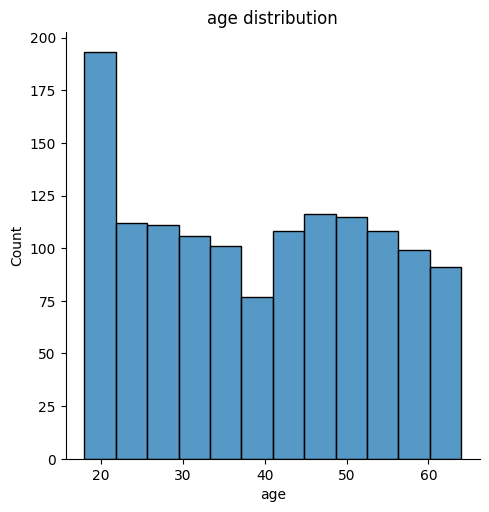

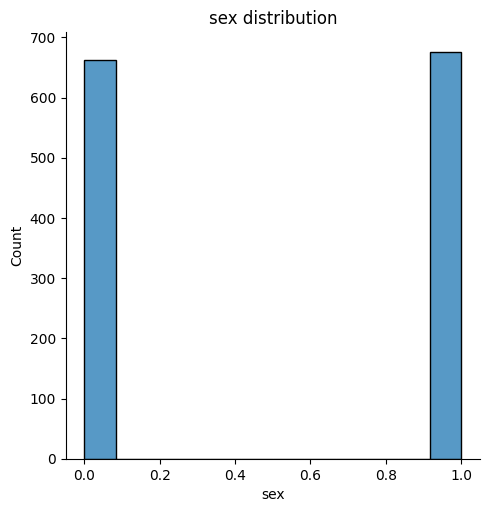

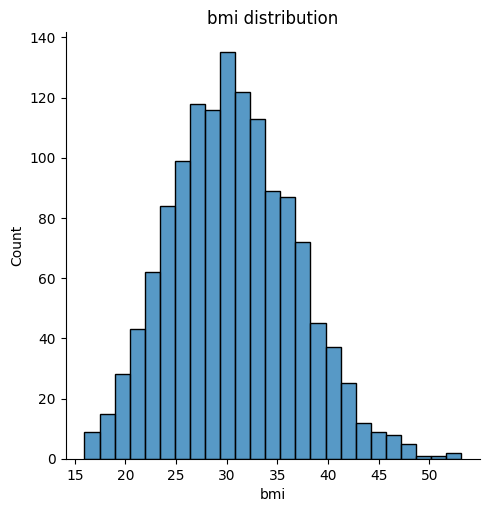

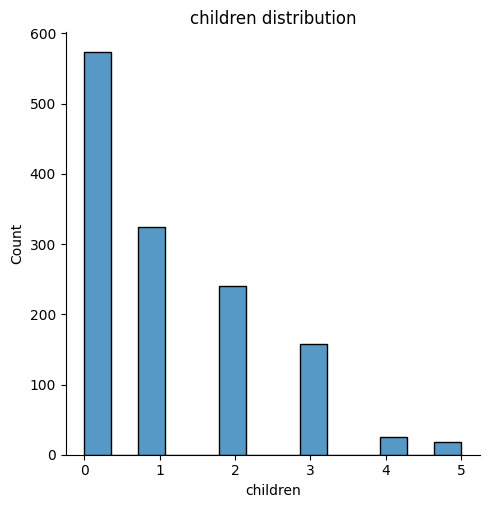

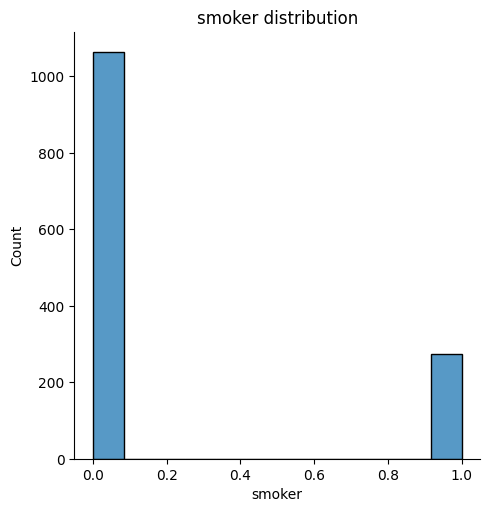

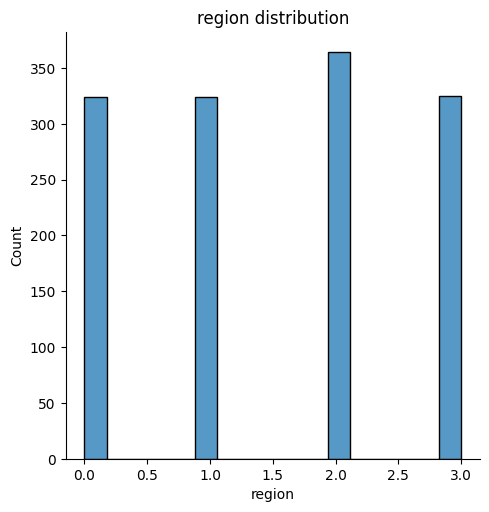

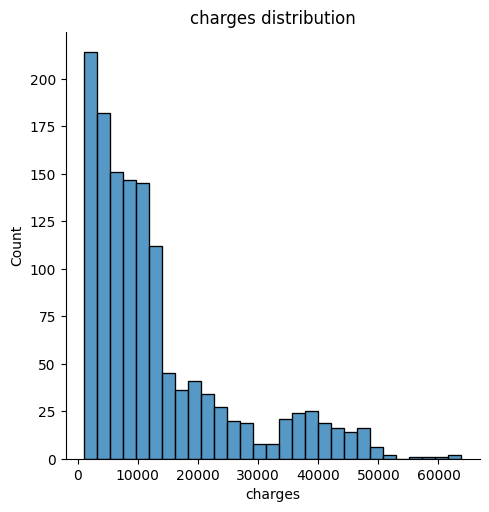

In [33]:
for i in df.columns:
  sns.displot(df[i])
  plt.title(i + " " + "distribution")
  plt.show()

In [41]:
colorsforx =["Red", "Green", "Blue", "Yellow", "Purple", "Orange"]
colorchanger = 0

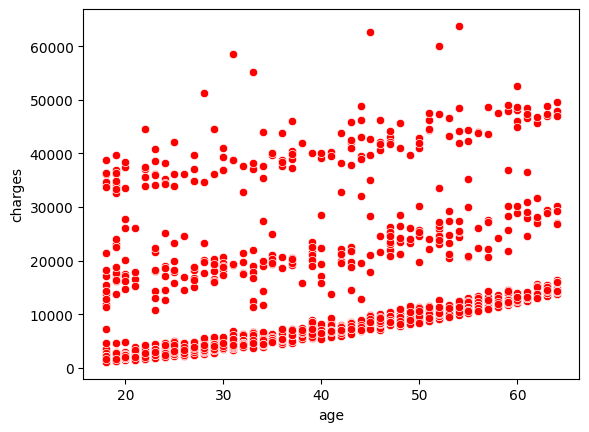

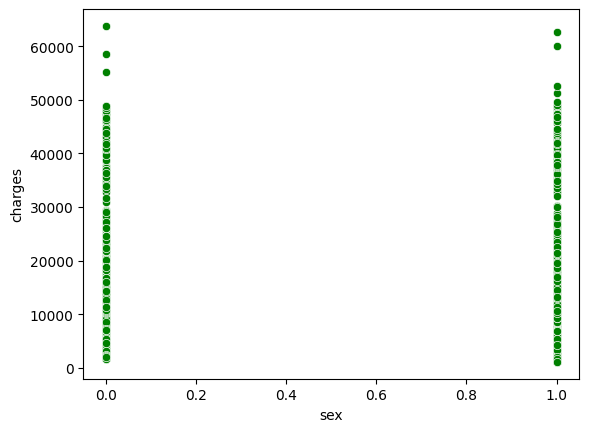

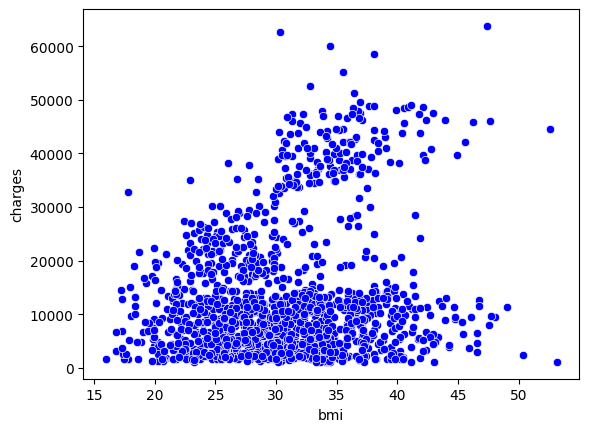

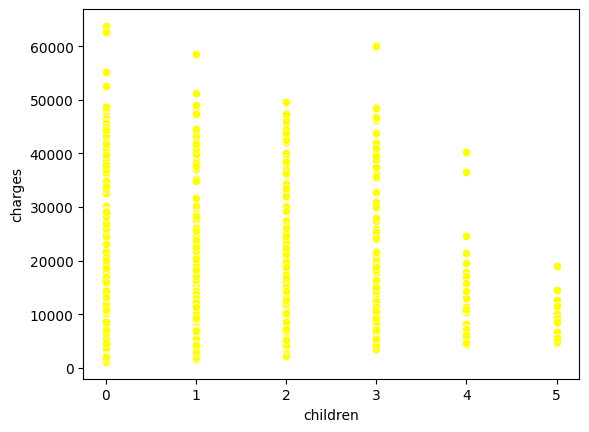

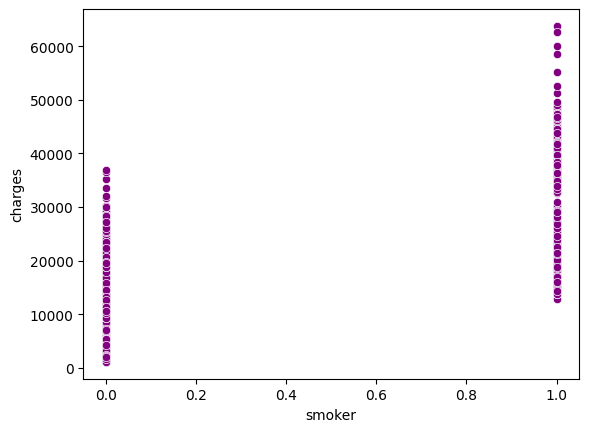

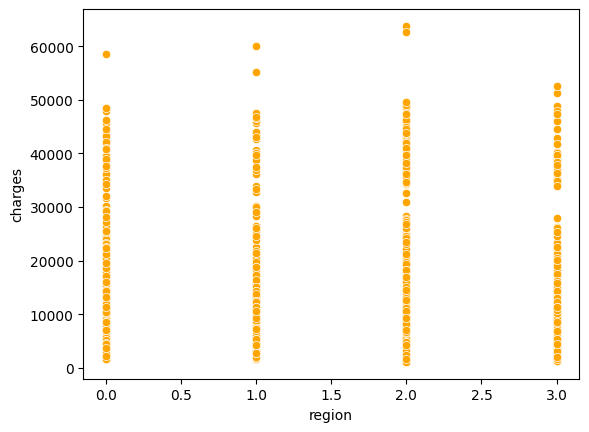

In [42]:
for i in df.columns[:-1]:
  sns.scatterplot(data = df, x = i, y = "charges", color= colorsforx[colorchanger])
  plt.show()
  colorchanger += 1